In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARMA, ARIMA
import itertools

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df =pd.read_csv(r"C:\Users\91758\Downloads\GlobalLandTemperaturesByCity\GlobalLandTemperaturesByCity.csv", delimiter=',')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
df.drop(['Latitude','Longitude'], axis=1, inplace= True)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country
0,1743-11-01,6.068,1.737,Århus,Denmark
1,1743-12-01,NaN,NaN,Århus,Denmark
2,1744-01-01,NaN,NaN,Århus,Denmark
3,1744-02-01,NaN,NaN,Århus,Denmark
4,1744-03-01,NaN,NaN,Århus,Denmark


In [4]:
df['dt']= pd.to_datetime(df['dt'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 5 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 328.0+ MB


In [6]:
df=df.set_index('dt')
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country
dt,,,,
1743-11-01,6.068,1.737,Århus,Denmark
1743-12-01,NaN,NaN,Århus,Denmark
1744-01-01,NaN,NaN,Århus,Denmark
1744-02-01,NaN,NaN,Århus,Denmark
1744-03-01,NaN,NaN,Århus,Denmark


In [7]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [8]:
df_country = df.Country.unique()
len(df_country)

159

In [9]:
df_India = df.drop('AverageTemperatureUncertainty', axis=1)

In [10]:
df_India = df_India[df_India.Country == "India"]

In [11]:
df_India.head(10)

,AverageTemperature,City,Country
dt,,,
1816-03-01,19.934,Abohar,India
1816-04-01,26.641,Abohar,India
1816-05-01,32.535,Abohar,India
1816-06-01,33.254,Abohar,India
1816-07-01,31.105,Abohar,India
1816-08-01,30.429,Abohar,India
1816-09-01,27.903,Abohar,India
1816-10-01,22.144,Abohar,India
1816-11-01,17.236,Abohar,India


In [12]:
df_India.shape

(1014906, 3)

In [13]:
# Filtering data starting from 1970-01-01
df_India = df_India.loc['1970-01-01':]

In [14]:
df_India

,AverageTemperature,City,Country
dt,,,
1970-01-01,13.027,Abohar,India
1970-02-01,15.301,Abohar,India
1970-03-01,20.847,Abohar,India
1970-04-01,29.236,Abohar,India
1970-05-01,33.912,Abohar,India
...,...,...,...
2013-05-01,29.286,Yelahanka,India
2013-06-01,25.401,Yelahanka,India
2013-07-01,24.232,Yelahanka,India


In [15]:
df_India.isnull().sum()

AverageTemperature    391
City                    0
Country                 0
dtype: int64

In [16]:
df_India.City.unique()

array(['Abohar', 'Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra',
       'Ahmadabad', 'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur',
       'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar', 'Ambala',
       'Ambarnath', 'Ambattur', 'Ambur', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Ara', 'Asansol', 'Aurangabad', 'Avadi',
       'Azamgarh', 'Badlapur', 'Bagaha', 'Bahadurgarh', 'Baharampur',
       'Bahraich', 'Baidyabati', 'Baleshwar', 'Ballia', 'Bally',
       'Balurghat', 'Banda', 'Bangalore', 'Bangaon', 'Bankura',
       'Bansbaria', 'Barakpur', 'Baranagar', 'Barasat', 'Barddhaman',
       'Bareli', 'Baripada', 'Barnala', 'Barsi', 'Basirhat', 'Basti',
       'Batala', 'Beawar', 'Begusarai', 'Belgaum', 'Bellary', 'Bettiah',
       'Bhadravati', 'Bhadreswar', 'Bhagalpur', 'Bharatpur', 'Bharuch',
       'Bhatpara', 'Bhavnagar', 'Bhilai', 'Bhilwara', 'Bhimavaram',
       'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhopal', 'Bhubaneswar', 'Bhuj',
       'Bhusawal', 'Bid',

In [17]:
df_India= df_India[df_India['City']=='New Delhi']

In [18]:
df_India

,AverageTemperature,City,Country
dt,,,
1970-01-01,14.892,New Delhi,India
1970-02-01,16.640,New Delhi,India
1970-03-01,22.505,New Delhi,India
1970-04-01,30.208,New Delhi,India
1970-05-01,33.986,New Delhi,India
...,...,...,...
2013-05-01,34.746,New Delhi,India
2013-06-01,33.066,New Delhi,India
2013-07-01,31.053,New Delhi,India


In [19]:
# Replacing NaN values with the previous effective data
df_India.AverageTemperature.fillna(method='pad', inplace=True)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
df_India.isnull().sum()

AverageTemperature    0
City                  0
Country               0
dtype: int64

In [21]:
df_India.describe()

,AverageTemperature
count,525.000000
mean,25.741992
std,6.635390
min,13.376000
25%,20.071000
50%,27.876000
75%,30.918000
max,36.339000


In [22]:
df_India['Ticks'] = range(0,len(df_India.index.values))
df_India.head(10)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AverageTemperature,City,Country,Ticks
dt,,,,
1970-01-01,14.892,New Delhi,India,0
1970-02-01,16.640,New Delhi,India,1
1970-03-01,22.505,New Delhi,India,2
1970-04-01,30.208,New Delhi,India,3
1970-05-01,33.986,New Delhi,India,4
1970-06-01,32.661,New Delhi,India,5
1970-07-01,31.830,New Delhi,India,6
1970-08-01,29.798,New Delhi,India,7
1970-09-01,29.424,New Delhi,India,8


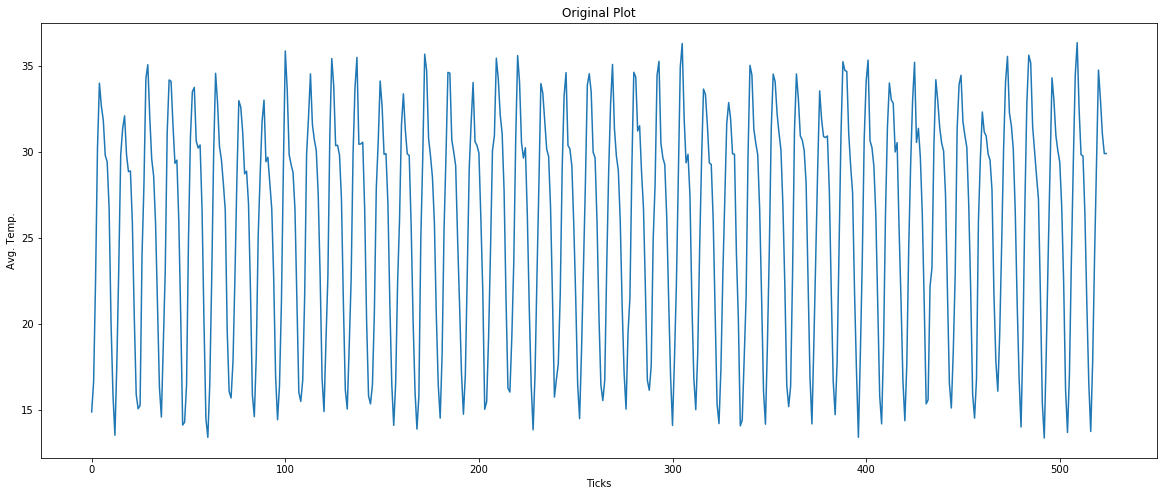

In [23]:
#very simple plotting
fig = plt.figure(figsize=(20,8))
plt.xlabel('Ticks')
plt.ylabel('Avg. Temp.')
plt.title('Original Plot')
plt.plot('Ticks', 'AverageTemperature', data = df_India);

In [24]:
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(12).mean()
    # Plot rolling statistics:
    plt.figure(figsize=(20,8))
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

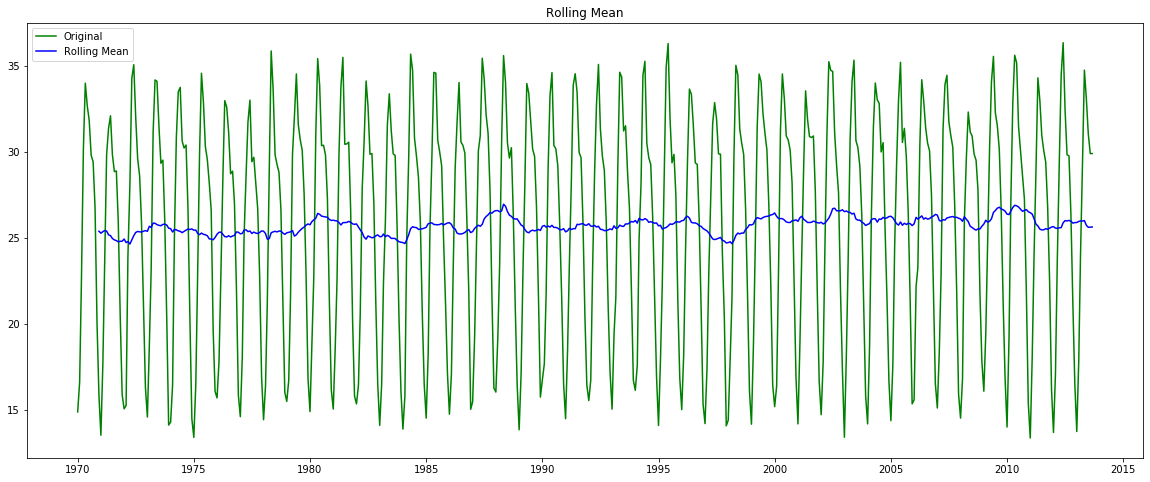

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-3.8925502963148393, 0.002090362038583878, 13, 511, {'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}, 1577.7315392785267)
df_output: 
 Test Statistic                  -3.89255
p-value                          0.00209
#Lags Used                      13.00000
Number of Observations Used    511.00000
dtype: float64
Test Statistic                  -3.892550
p-value                          0.002090
#Lags Used                      13.000000
Number of Observations Used    511.000000
Critical Value (1%)             -3.443212
Critical Value (5%)             -2.867213
Critical Value (10%)            -2.569791
dtype: float64


In [25]:
stationarity_check(df_India.AverageTemperature)

As we see the p-value is 0.000209, which is very less than the standard threshold value of 0.05, null-hypothesis which states that the data is not stationary is rejected.

In [32]:
df_India['Roll_Mean'] = df_India['AverageTemperature'].rolling(12).mean()
df_India.head(20)

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AverageTemperature,City,Country,Ticks,Roll_Mean
dt,,,,,
1970-01-01,14.892,New Delhi,India,0,NaN
1970-02-01,16.640,New Delhi,India,1,NaN
1970-03-01,22.505,New Delhi,India,2,NaN
1970-04-01,30.208,New Delhi,India,3,NaN
1970-05-01,33.986,New Delhi,India,4,NaN
1970-06-01,32.661,New Delhi,India,5,NaN
1970-07-01,31.830,New Delhi,India,6,NaN
1970-08-01,29.798,New Delhi,India,7,NaN
1970-09-01,29.424,New Delhi,India,8,NaN


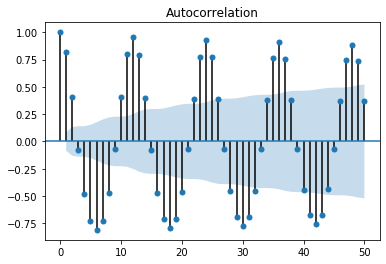

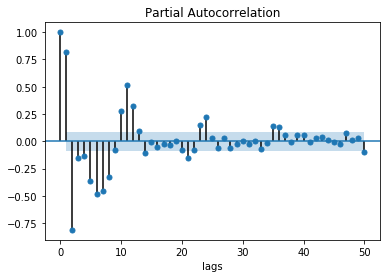

In [33]:
plot_acf(df_India.AverageTemperature, lags=50)
plot_pacf(df_India.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()

#### ARMA Model

In [55]:
ts=df_India['AverageTemperature'].values

In [54]:
p = q = range(0, 4)
pq = list(itertools.product(p, q))
for param in pq:
    try:
        mod = ARMA(ts,order=param)
        results = mod.fit()
        print('ARMA{} - LLR:{}, AIC:{}'.format(param, results.llf, results.aic))
    except:
        continue  

ARMA(0, 0) - LLR:-1737.9614172566621, AIC:3479.9228345133242
ARMA(0, 1) - LLR:-1469.8244199964747, AIC:2945.6488399929494
ARMA(1, 0) - LLR:-1443.0818866998006, AIC:2892.1637733996013
ARMA(1, 1) - LLR:-1302.3264164825173, AIC:2612.6528329650346
ARMA(1, 2) - LLR:-1461.6784945677837, AIC:2933.3569891355673
ARMA(1, 3) - LLR:-1311.546027500112, AIC:2635.092055000224
ARMA(2, 0) - LLR:-1157.1325769233665, AIC:2322.265153846733
ARMA(2, 2) - LLR:-1091.3263957506358, AIC:2194.6527915012716
ARMA(2, 3) - LLR:-1029.8296836664272, AIC:2073.6593673328543
ARMA(3, 0) - LLR:-1151.3470676156255, AIC:2312.694135231251


C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARMA(3, 2) - LLR:-1073.0615565734183, AIC:2160.1231131468367
ARMA(3, 3) - LLR:-1025.7082367339692, AIC:2067.4164734679384


I found p=3 and q=3 with the lowest AIC and largest LLR. I used ARMA model to fit the data and I used the metric Mean Squared Error to find the closeness between actual and fitted data points.

In [68]:
model = ARMA(ts,order=(3,3))  
results_MA = model.fit()  

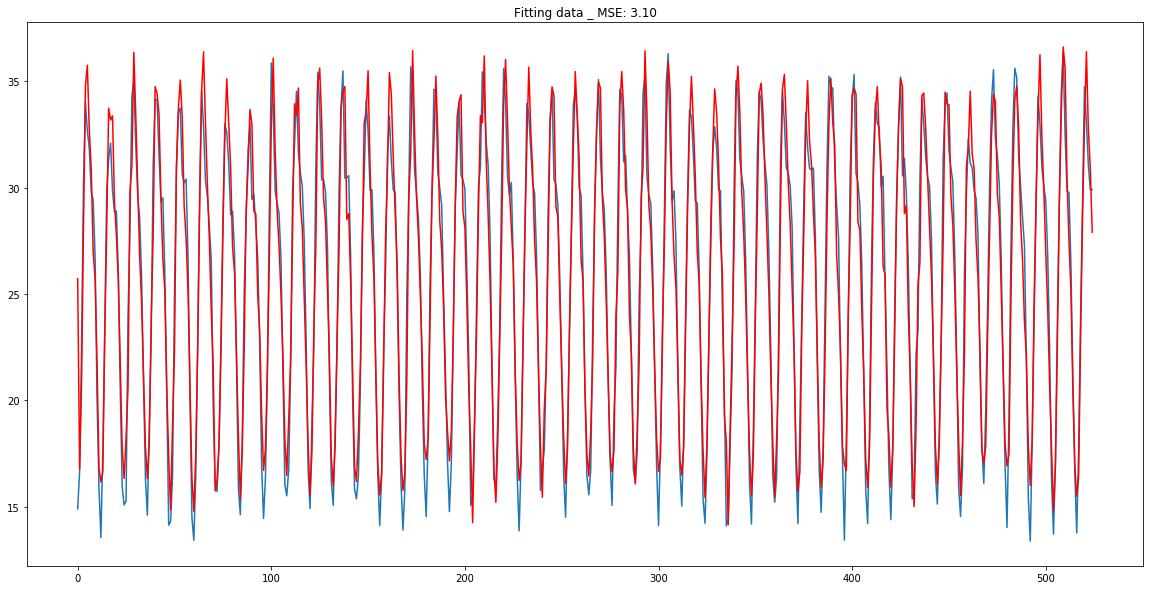

In [69]:
plt.figure(figsize=(20,10))
plt.plot(ts)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-ts)**2).mean()))
plt.show()

### Prophet

In [89]:
from fbprophet import Prophet

In [93]:
tt = df_India.groupby('dt').sum()['AverageTemperature'].reset_index()
tt.columns = ['ds','y']
tt['ds'] = pd.to_datetime(tt['ds'])

In [94]:
tt.head()

,ds,y
0,1970-01-01,14.892
1,1970-02-01,16.640
2,1970-03-01,22.505
3,1970-04-01,30.208
4,1970-05-01,33.986


In [96]:
m = Prophet(interval_width=0.95)
m.fit(tt)
future = m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
550,2013-09-27
551,2013-09-28
552,2013-09-29
553,2013-09-30
554,2013-10-01


In [97]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
550,2013-09-27,27.558788,25.672980,29.451209
551,2013-09-28,27.383061,25.647752,29.453762
552,2013-09-29,27.210617,25.340017,29.037078
553,2013-09-30,27.040459,24.960134,28.879730
554,2013-10-01,26.871394,24.941347,28.837227


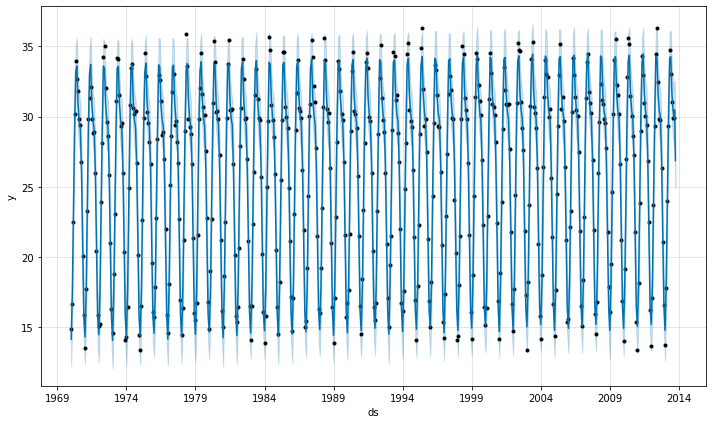

In [98]:
confirmed_forecast_plot = m.plot(forecast)